In [12]:
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
path = "20230914_1810_data.CSV"
# Date is YYYYMMDD_HHMM
df = pd.read_csv(path,header=None, sep=',')
df.columns = ['Time', 'Pressure', 'TC', 'AmbientT', 'AmbientV']
# Time in sec, pressure in V, TC (= thermocouple) in mV, AmbientT in C and AmbientV in mV 
#print(df['Pressure])

# Convert miliseconds from arduino to seconds
df['Time'] = pd.to_numeric(df['Time'], errors='coerce') 
#df['Time'] = df['Time'] / 1000 #Time in seconds

#Convert voltaga reading from sensor to kPa
#df['Pressure'] = ((df['Pressure']/1023)-0.04)/0.009
Pmax = 5 #PSS
df['Pressure'] = (df['Pressure']*2*Pmax/4)*6.895e3 # Pa

# Display the first few rows of the DataFrame
print(df)


        Time  Pressure    TC  AmbientT  AmbientV
0          0  8791.125  2.92     42.57       693
1          1  8791.125  2.83     26.45       528
2          3  8791.125  2.83     25.31       515
3          5  8446.375  1.30     23.30       492
4          6  8791.125  3.83     24.78       509
...      ...       ...   ...       ...       ...
50952  82789  9135.875  7.71     27.78       543
50953  82790  9135.875  6.53     27.78       543
50954  82792  9135.875  6.80     27.52       540
50955  82794  9135.875  5.09     26.72       531
50956  82795  9135.875  4.37     26.63       530

[50957 rows x 5 columns]


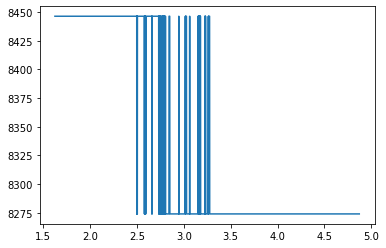

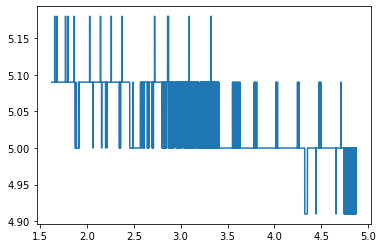

In [17]:
slice_start = 3600
n_hours = 2
slice_end=slice_start+n_hours*3600
plt.plot(df['Time'][slice_start:slice_end]/3600,df['Pressure'][slice_start:slice_end])
plt.show()

plt.plot(df['Time'][slice_start:slice_end]/3600,df['TC'][slice_start:slice_end])